In [ ]:
!gdown --id 19p3qtGNlc_p12bi3wnbXtELUAR7CE6p8

Downloading...
From: https://drive.google.com/uc?id=19p3qtGNlc_p12bi3wnbXtELUAR7CE6p8
To: /kaggle/working/data.zip
1.45GB [00:06, 231MB/s]


In [ ]:
!mkdir dataset

In [ ]:
!unzip data.zip -d dataset

Archive:  data.zip
  inflating: dataset/from-to-rqd.xlsx  
  inflating: dataset/label.xlsx      
   creating: dataset/test-rqd/
  inflating: dataset/test-rqd/M3-BH3299-1.jpg  
  inflating: dataset/test-rqd/M3-BH3299-2.jpg  
  inflating: dataset/test-rqd/M3-BH3299-3.jpg  
  inflating: dataset/test-rqd/M3-BH3299-4.jpg  
  inflating: dataset/test-rqd/M3-BH3299-5.jpg  
  inflating: dataset/test-rqd/M3-BH3299-6.jpg  
  inflating: dataset/test-rqd/M3-BH3299-7.jpg  
  inflating: dataset/test-rqd/M3-BH3299-8.jpg  
  inflating: dataset/test-rqd/M3-BH3299-9.jpg  
  inflating: dataset/test-rqd/M3-BH3300-1.jpg  
  inflating: dataset/test-rqd/M3-BH3300-10.jpg  
  inflating: dataset/test-rqd/M3-BH3300-11.jpg  
  inflating: dataset/test-rqd/M3-BH3300-12.jpg  
  inflating: dataset/test-rqd/M3-BH3300-13.jpg  
  inflating: dataset/test-rqd/M3-BH3300-14.jpg  
  inflating: dataset/test-rqd/M3-BH3300-15.jpg  
  inflating: dataset/test-rqd/M3-BH3300-16.jpg  
  inflating: dataset/test-rqd/M3-BH3300-17.jpg  


In [ ]:
!rm data.zip

In [ ]:
!git clone https://github.com/fizyr/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 6205, done.
remote: Total 6205 (delta 0), reused 0 (delta 0), pack-reused 6205
Receiving objects: 100% (6205/6205), 13.47 MiB | 32.37 MiB/s, done.
Resolving deltas: 100% (4200/4200), done.


In [ ]:
!mv 'dataset' 'keras-retinanet'

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
# os.chdir('drive/MyDrive/Unidero')

In [ ]:
# !ls

keras-retinanet  Q2.ipynb			 retinanet-v1.ipynb
Q1.ipynb	 RetinaNet_Custom_Dataset.ipynb  test.ipynb


In [ ]:
%cd keras-retinanet/
!pip install .

/content/drive/MyDrive/Unidero/keras-retinanet
Processing /content/drive/MyDrive/Unidero/keras-retinanet
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp37-cp37m-linux_x86_64.whl size=168050 sha256=789ee746add4f0f2e9772cf682c3eb6d33879e9e18a6bfbcae917ea9bb24462f
  Stored in directory: /root/.cache/pip/wheels/85/88/2f/ea47682dd5f7f1ea3c5d87c593d0cdc5b6603d40d2f043f565
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=56b260f536a2850adbd6e879f38b2655e2fda5ed1f802a13c7044b7e70499b4d
  Stored in directory: /root/.cache/pip/wheels

In [ ]:
!python setup.py build_ext --inplace

running build_ext
skipping 'keras_retinanet/utils/compute_overlap.c' Cython extension (up-to-date)
copying build/lib.linux-x86_64-3.7/keras_retinanet/utils/compute_overlap.cpython-37m-x86_64-linux-gnu.so -> keras_retinanet/utils


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import urllib
from PIL import Image
import pandas as pd

from keras_retinanet import models
from keras_retinanet.utils.image import preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

In [ ]:
#!pip install xlrd==1.2.0

     |████████████████████████████████| 103 kB 5.8 MB/s 


In [ ]:
df = pd.read_excel('dataset/label.xlsx')

In [ ]:
# df.head(10)

,image_name,label_name,xmin,ymin,width,height,image_width,image_height
0,M3-BH130-1.jpg,wood,2412,1552,152,197,4020,2929
1,M3-BH130-1.jpg,wood,2917,2072,140,220,4020,2929
2,M3-BH130-1.jpg,wood,3820,1567,167,209,4020,2929
3,M3-BH130-1.jpg,wood,3603,2341,201,186,4020,2929
4,M3-BH130-1.jpg,wood,1676,2713,159,171,4020,2929
5,M3-BH130-1.jpg,+10cm rock,94,1563,307,209,4020,2929
6,M3-BH130-1.jpg,+10cm rock,439,1559,330,209,4020,2929
7,M3-BH130-1.jpg,+10cm rock,398,1836,288,182,4020,2929
8,M3-BH130-1.jpg,+10cm rock,936,1833,433,197,4020,2929
9,M3-BH130-1.jpg,+10cm rock,1399,1825,285,197,4020,2929


In [ ]:
df['image_name'] = 'dataset/train/' + df['image_name'].values

In [ ]:
train_annotation = df.rename(columns={"xmin": "x_min", "ymin": "y_min", "label_name":"class_name"})

In [ ]:
train_annotation.drop(['image_width', 'image_height'], axis=1, inplace=True)

In [ ]:
# train_annotation.head()

,image_name,class_name,x_min,y_min,width,height
0,dataset/train/M3-BH130-1.jpg,wood,2412,1552,152,197
1,dataset/train/M3-BH130-1.jpg,wood,2917,2072,140,220
2,dataset/train/M3-BH130-1.jpg,wood,3820,1567,167,209
3,dataset/train/M3-BH130-1.jpg,wood,3603,2341,201,186
4,dataset/train/M3-BH130-1.jpg,wood,1676,2713,159,171


In [ ]:
train_annotation['x_max'] = train_annotation['x_min'] + train_annotation['width']
train_annotation['y_max'] = train_annotation['y_min'] + train_annotation['height']

In [ ]:
train_annotation.drop(['width', 'height'], axis=1, inplace=True)

In [ ]:
train_annotation = train_annotation[['image_name', 'x_min', 'y_min', 'x_max', 'y_max', 'class_name']]

In [ ]:
# train_annotation.head()

,image_name,x_min,y_min,x_max,y_max,class_name
0,dataset/train/M3-BH130-1.jpg,2412,1552,2564,1749,wood
1,dataset/train/M3-BH130-1.jpg,2917,2072,3057,2292,wood
2,dataset/train/M3-BH130-1.jpg,3820,1567,3987,1776,wood
3,dataset/train/M3-BH130-1.jpg,3603,2341,3804,2527,wood
4,dataset/train/M3-BH130-1.jpg,1676,2713,1835,2884,wood


In [ ]:
print(train_annotation.shape)

(2363, 6)

In [ ]:
def show_image_with_boxes(df):
    # pick a random image
    filepath = train_annotation.sample()['image_name'].values[0]

    # get all rows for this image
    df2 = train_annotation[train_annotation['image_name'] == filepath]
    im = np.array(Image.open(filepath))

    im = im[:, :, :3]

    for idx, row in df2.iterrows():
        box = [
          row['x_min'],
          row['y_min'],
          row['x_max'],
          row['y_max'],
        ]

        print(box)
        draw_box(im, box, color=(255, 0, 0))
    plt.axis('off')
    plt.imshow(im)
    plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]

[82, 1745, 1169, 1973]
[1234, 1762, 1543, 1973]
[1603, 1762, 2338, 1977]
[2772, 1758, 3997, 1981]
[151, 2076, 985, 2274]
[1367, 2084, 3954, 2247]
[90, 2381, 825, 2587]
[1363, 2390, 2708, 2605]
[3168, 2407, 3679, 2609]
[155, 2678, 482, 2893]
[563, 2678, 1117, 2923]
[1315, 2699, 1968, 2927]
[2080, 2712, 2768, 2935]
[1169, 3030, 1818, 3245]
[1921, 3026, 2867, 3249]
[2979, 3009, 4015, 3237]
[3971, 2080, 4040, 2299]
[972, 3017, 1088, 3210]


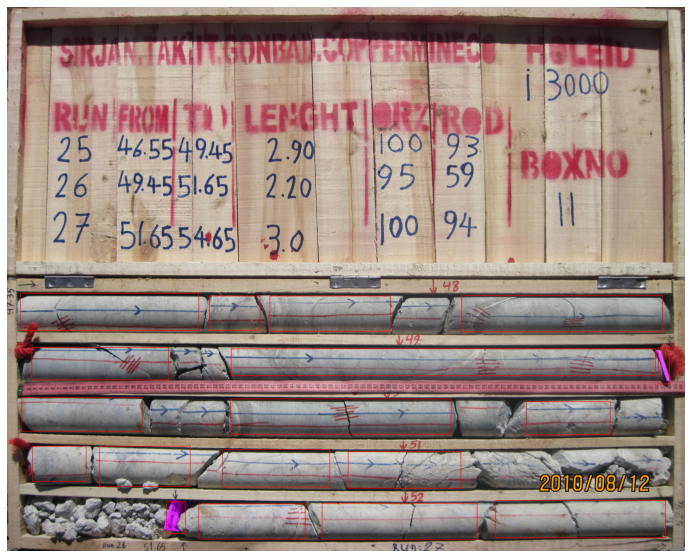

In [ ]:
show_image_with_boxes(train_annotation)

In [ ]:
train_annotation.to_csv('annotations.csv', index=False, header=None)

In [ ]:
classes_array = train_annotation['class_name'].unique()
classes = classes_array.tolist()
# classes

['wood', '+10cm rock']

In [ ]:
with open('classes.csv', 'w') as f:
    for i, class_name in enumerate(classes):
        f.write(f'{class_name}, {i}\n')

In [ ]:
!head classes.csv

wood, 0
+10cm rock, 1


In [ ]:
!head annotations.csv

dataset/train/M3-BH130-1.jpg,2412,1552,2564,1749,wood
dataset/train/M3-BH130-1.jpg,2917,2072,3057,2292,wood
dataset/train/M3-BH130-1.jpg,3820,1567,3987,1776,wood
dataset/train/M3-BH130-1.jpg,3603,2341,3804,2527,wood
dataset/train/M3-BH130-1.jpg,1676,2713,1835,2884,wood
dataset/train/M3-BH130-1.jpg,94,1563,401,1772,+10cm rock
dataset/train/M3-BH130-1.jpg,439,1559,769,1768,+10cm rock
dataset/train/M3-BH130-1.jpg,398,1836,686,2018,+10cm rock
dataset/train/M3-BH130-1.jpg,936,1833,1369,2030,+10cm rock
dataset/train/M3-BH130-1.jpg,1399,1825,1684,2022,+10cm rock


In [ ]:
if not os.path.exists('snapshots'):
    os.mkdir('snapshots')

In [ ]:
PRETRAINED_MODEL = 'snapshots/_pretrained_model.h5'

In [ ]:
URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'

urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)

print('Downloaded pretraind model to ', PRETRAINED_MODEL)

Downloaded pretraind model to  snapshots/_pretrained_model.h5


In [ ]:
# !ls

CONTRIBUTORS.md  annotations.csv  dataset   keras_retinanet   setup.py
LICENSE		 build		  examples  requirements.txt  snapshots
README.md	 classes.csv	  images    setup.cfg	      tests


In [ ]:
!python keras_retinanet/bin/train.py --freeze-backbone --random-transform --weights {PRETRAINED_MODEL} --batch-size 6 --steps 26 --epochs 30 csv annotations.csv classes.csv

2021-08-22 18:46:26.312619: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Creating model, this may take a second...
2021-08-22 18:46:30.373032: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-08-22 18:46:30.376278: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-08-22 18:46:30.393182: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-22 18:46:30.393924: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-08-22 18:46:30.393972:

In [ ]:
!ls snapshots

DriveUploader	      resnet50_csv_17.h5  resnet50_csv_55.h5
_pretrained_model.h5  resnet50_csv_30.h5


In [ ]:
# from glob import glob
# model_paths = glob('snapshots/resnet50_csv_*.h5')
# latest_path = sorted(model_paths)[-1]
# print("path: ", latest_path)

latest_path = 'snapshots/resnet50_csv_30.h5'


model = models.load_model(latest_path, backbone_name='resnet50')
model = models.convert_model(model)

label_map = {}
for line in open('classes.csv'):
    row = line.rstrip().split(',')
    label_map[int(row[1])] = row[0]

In [ ]:
def show_image_with_prediction(filepath, threshold=0.6):
    # choose a random image
 #   row = df.sample()
 #   filepath = row['image_name'].values[0]
    print('filepath:', filepath)

    #get all rows for this image
    df2 = df[df['image_name'] == filepath]
    im = np.array(Image.open(filepath))
    print('im.shape:', im.shape)

    # if there's a PNG it will have alpha channel
    im = im[:, :, :3]

    ### plot predictions ###

    # get predictions
    imp = preprocess_image(im)
    imp, scale = resize_image(im)

    boxes, scores, labels = model.predict_on_batch(
      np.expand_dims(imp, axis=0)
    )

    # standardize box coordinates
    boxes /= scale

    # loop through each predictions for the input image
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        # scores are sorted in descending order
        # score: confidence about correspoding object to an actual object
        # score range: 0-1 and -1 is background

        if score < threshold:
            break

        box = box.astype(np.int32)
        print(box)

        # different objs have different colors
        color = label_color(label)
        draw_box(im, box, color=color)

        class_name = classes[label]
        caption = f"{class_name} {score:.3f}"
        draw_caption(im, box, caption)

    plt.axis('off')
    plt.imshow(im)
    plt.show()

In [ ]:
show_image_with_prediction(train_annotaion, threshold=0.27)

NameError: ignored

In [ ]:
image_name = os.listdir('dataset/test-rqd')
# image_name

In [ ]:
test_df = pd.DataFrame(image_name, columns = ['image_name'])
test_df['image_name'] = 'dataset/test-rqd/' + test_df['image_name']

In [ ]:
# test_df.head()

In [ ]:
def boxes(filepath, threshold=0.6):

    print('filepath:', filepath)

    im = np.array(Image.open(filepath))
    print('im.shape:', im.shape)

    # if there's a PNG it will have alpha channel
    im = im[:, :, :3]

    ### plot predictions ###

    # get predictions
    imp = preprocess_image(im)
    imp, scale = resize_image(im)

    boxes, scores, labels = model.predict_on_batch(
      np.expand_dims(imp, axis=0)
    )

    # standardize box coordinates
    boxes /= scale

    i = 0
    preds = []
    # loop through each predictions for the input image
    for box, score, label in zip(boxes[0], scores[0], labels[0]):

        if score < threshold:
            break

        box = box.astype(np.int32)
        class_name = classes[label]

        preds.append([])
        preds[i].append(box[0])
        preds[i].append(box[1])
        preds[i].append(box[2])
        preds[i].append(box[3])
        preds[i].append(label)

        i += 1


    return im.shape, preds

In [ ]:
def detect_run(cols, cx, cy):
  box_cx = cols['cx']
  box_cy = cols['cy']

  cy = list(cy)

  for i,v in enumerate(cy):
    if(i < len(cy) - 1):
       if(((box_cy - cy[i]) > 0 and (box_cy - cy[i+1]) < 0)):
         if(abs(box_cy - cy[i]) < 50):
           if((box_cx - cx[i+1]) < 0):
            return i
            break
           elif((box_cx - cx[i]) > 0):
            return i+1
            break
         else:
            return i+1
            break

In [ ]:
def calculate_run(image_name):
  filepath = 'dataset/test-rqd/' + image_name
  image_shape, preds = boxes(filepath, threshold=0.3)
  preds_df = pd.DataFrame(preds, columns=['x_min','y_min','x_max','y_max','label'])
  preds_df['cx'] = preds_df['x_min'] + ((preds_df['x_max'] - preds_df['x_min']) / 2).astype(np.int32)
  preds_df['cy'] = preds_df['y_min'] + ((preds_df['y_max'] - preds_df['y_min']) / 2).astype(np.int32)

  wood_df = preds_df[preds_df['label'] == 0]
  min_wood_df = wood_df[['cx', 'cy']]
  min_wood_df = min_wood_df.append({'cx':0, 'cy':0}, ignore_index=True)
  min_wood_df = min_wood_df.append({'cx':image_shape[1], 'cy':image_shape[0]}, ignore_index=True)
  min_wood_df.sort_values(by = 'cy', inplace=True)

  box_df = preds_df[preds_df['label'] == 1]
  if(box_df.empty == False):
    box_df['run'] = box_df[['cx', 'cy']].apply(detect_run, args = (min_wood_df['cx'], min_wood_df['cy']), axis=1)
    box_df['diff_x'] = ((box_df['x_max'] - box_df['x_min']) * 0.78) / image_shape[1]

  return box_df

In [ ]:
# !ls

In [ ]:
run_df = pd.read_excel('dataset/from-to-rqd.xlsx')

In [ ]:
# run_df

In [ ]:
run_df['lt'] = run_df['to'] - run_df['from']
# run_df

In [ ]:
def dir_to_name(x):
    x = x[::-1]
    index = x.find("-")
    temp = x[index+1:]
    return temp[::-1]

In [ ]:
def dir_to_run(x):
    x = x[::-1]
    index = x.find("-")
    temp = x[:index]
    return temp[::-1]

In [ ]:
run_df['image_name'] = run_df['RunId'].apply(dir_to_name)
run_df['run'] = run_df['RunId'].apply(dir_to_run)
# run_df

In [ ]:
def cal_sumlt10(cols):
  print(cols)
  runs = cols['run'].unique()
  diff_x = cols['diff_x']

  for run in runs:
    sumlt10 = cols.loc[cols['run'] == run].diff_x.sum()
    print(sumlt10)
  return sumlt10


In [ ]:
i = 0
for name in image_name:
  n, e = name.split('.')
  r_df = run_df[run_df['image_name'] == n]
  b_df = calculate_run(name)
  if 'run' in b_df:
    b_df.dropna(subset = ['run'], inplace=True)
    b_df = b_df.astype({'run': int})
    b_df['diff_x'] = b_df[b_df['diff_x'] >= 0.10]
    b_df = b_df.groupby('run').sum()
    b_df['run'] = b_df.index
    n = n + '-'
    b_df['RunId'] = n + b_df['run'].astype('str')
    if(i == 0):
      new_df = b_df[['RunId', 'diff_x']]
    else:
      new_df = new_df.append(b_df[['RunId', 'diff_x']])

    i += 1  
  else:
    i += 1
    break


filepath: dataset/test-rqd/M3-BH3301-21.jpg
im.shape: (3395, 4047, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3301-20.jpg
im.shape: (3191, 4021, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3301-19.jpg
im.shape: (3420, 4235, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3301-18.jpg
im.shape: (3284, 4043, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3301-17.jpg
im.shape: (2879, 3994, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3301-16.jpg
im.shape: (3282, 4033, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3301-15.jpg
im.shape: (2838, 3980, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3301-14.jpg
im.shape: (2802, 3900, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3301-13.jpg
im.shape: (3328, 4021, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3301-12.jpg
im.shape: (3299, 4104, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3301-11.jpg
im.shape: (3331, 4128, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3301-10.jpg
im.shape: (2794, 3836, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3301-9.jpg
im.shape: (2866, 3952, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3301-8.jpg
im.shape: (3231, 3922, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3301-7.jpg
im.shape: (3355, 4159, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3301-6.jpg
im.shape: (2748, 3912, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3301-5.jpg
im.shape: (3293, 3922, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3301-4.jpg
im.shape: (3304, 4012, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3301-3.jpg
im.shape: (3329, 4074, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3301-2.jpg
im.shape: (3222, 4070, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3301-1.jpg
im.shape: (3550, 3932, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3300-18.jpg
im.shape: (3074, 3581, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3300-17.jpg
im.shape: (2742, 3599, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3300-16.jpg
im.shape: (2764, 3603, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3300-15.jpg
im.shape: (2714, 3566, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3300-14.jpg
im.shape: (2769, 3572, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3300-13.jpg
im.shape: (2924, 3710, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3300-12.jpg
im.shape: (2979, 3603, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3300-11.jpg
im.shape: (2776, 3619, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3300-10.jpg
im.shape: (2912, 3614, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3300-9.jpg
im.shape: (2824, 3622, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3300-8.jpg
im.shape: (2983, 3739, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3300-7.jpg
im.shape: (2766, 3586, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3300-6.jpg
im.shape: (3097, 3671, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3300-5.jpg
im.shape: (2784, 3586, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3300-4.jpg
im.shape: (3074, 3628, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3300-3.jpg
im.shape: (2789, 3562, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3300-2.jpg
im.shape: (2821, 3594, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3300-1.jpg
im.shape: (3137, 3856, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3299-9.jpg
im.shape: (2849, 3756, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3299-8.jpg
im.shape: (3414, 3869, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3299-7.jpg
im.shape: (2808, 3877, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filepath: dataset/test-rqd/M3-BH3299-6.jpg
im.shape: (3100, 3799, 3)


In [ ]:
# new_df

In [ ]:
run_df = run_df.merge(new_df, how='left', on='RunId')

In [ ]:
# run_df

In [ ]:
run_df['diff_x'] = run_df['diff_x'].fillna(0)
# run_df

In [ ]:
run_df['rqd'] = (run_df['diff_x'] / run_df['lt']) * 100
# run_df

In [ ]:
def group_prediction(x):
  if x <= 25:
    label = 1
  elif x > 25 and x <= 50:
    label = 2
  elif x > 50 and x <= 75:
    label = 3
  elif x > 75 and x <= 90:
    label = 4
  else:
    label = 5
  
  return label


run_df['Prediction'] = run_df['rqd'].apply(group_prediction)

In [ ]:
# run_df

In [ ]:
final_df = run_df[['RunId', 'Prediction']]
# final_df

In [ ]:
final_df.to_csv('output.csv', index=False)

In [ ]:
!head output.csv

RunId,Prediction
M3-BH3299-1-1,1
M3-BH3299-1-2,1
M3-BH3299-1-3,1
M3-BH3299-2-1,1
M3-BH3299-2-2,1
M3-BH3299-2-3,1
M3-BH3299-2-4,1
M3-BH3299-2-5,1
M3-BH3299-2-6,1
